## Step 0: Importing Libraries

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import transform
import cv2 as cv2
import seaborn as sns

## Step 1: Importing Data

In [2]:
df = pd.read_csv('section3.csv')
df.head()

,Image,Label
0,./data/Marlon_Devonish/Marlon_Devonish_0001.jpg,Marlon_Devonish
1,./data/Dolly_Parton/Dolly_Parton_0002.jpg,Dolly_Parton
2,./data/Dolly_Parton/Dolly_Parton_0001.jpg,Dolly_Parton
3,./data/Rocco_Buttiglione/Rocco_Buttiglione_000...,Rocco_Buttiglione
4,./data/Brandon_Lloyd/Brandon_Lloyd_0001.jpg,Brandon_Lloyd


## Step 2: Data Preprocessing

### Step 2.1: Cleaning Data

In [3]:
df_count = df.groupby('Label').count().sort_values(by = df.columns[0], ascending=False)
df_count.columns = ['ImageCount']
df_count

,ImageCount
Label,
George_W_Bush,530
Colin_Powell,236
Tony_Blair,144
Donald_Rumsfeld,121
Gerhard_Schroeder,109
Ariel_Sharon,77
Hugo_Chavez,71
Junichiro_Koizumi,60
Jean_Chretien,55


In [4]:
df_filter = df_count[(df_count['ImageCount']) >= 50 ]
df_filter

,ImageCount
Label,
George_W_Bush,530
Colin_Powell,236
Tony_Blair,144
Donald_Rumsfeld,121
Gerhard_Schroeder,109
Ariel_Sharon,77
Hugo_Chavez,71
Junichiro_Koizumi,60
Jean_Chretien,55


In [5]:
list_index = df_filter.index.tolist()
df_filter.index

Index(['George_W_Bush', 'Colin_Powell', 'Tony_Blair', 'Donald_Rumsfeld',
       'Gerhard_Schroeder', 'Ariel_Sharon', 'Hugo_Chavez', 'Junichiro_Koizumi',
       'Jean_Chretien', 'John_Ashcroft', 'Jacques_Chirac', 'Serena_Williams'],
      dtype='object', name='Label')

In [6]:
final_df = df.loc[df['Label'].isin(list_index)]
final_df.shape

(1560, 2)

In [7]:
final_df.head()

,Image,Label
489,./data/George_W_Bush/George_W_Bush_0394.jpg,George_W_Bush
490,./data/George_W_Bush/George_W_Bush_0377.jpg,George_W_Bush
491,./data/George_W_Bush/George_W_Bush_0204.jpg,George_W_Bush
492,./data/George_W_Bush/George_W_Bush_0203.jpg,George_W_Bush
493,./data/George_W_Bush/George_W_Bush_0416.jpg,George_W_Bush


### Step 2.2: Image Cropping

In [8]:
X = []
y = []
X_dict = {}

for index, row in final_df.iterrows():
    local_image =cv2.cvtColor( cv2.imread(row[0]) , cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(local_image, (96, 96))
    resized_image = resized_image[10:86,10:86]
    if row[1] not in X_dict:
        X_dict[row[1]] = [resized_image]
    else:
        X_dict[row[1]].append(resized_image)
    X.append( resized_image)
    y.append(row[1])

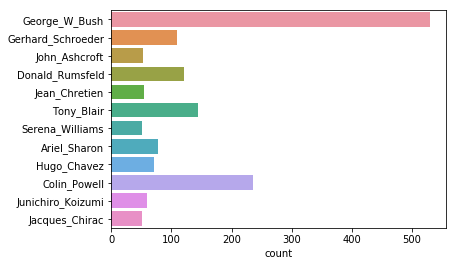

In [9]:
sns.countplot(y = y)

### Step 2.3 Image Augmentation and Class Balancing

In [10]:
def imgAug(img):
    result  = 255 *  transform.rotate(img, angle=np.random.uniform(-30,30), mode='edge')
    result = result.astype(np.uint8)
    return result

In [11]:
median = 400
X_updated = {}
X_augmented = []
y_augmented = []
for key, value in X_dict.items():
    if len(value) < 400:
        temp_values  = []
        for every_value in value:
            temp_values.append(every_value)
        i=0
        while(len(temp_values) != 400):
            if(i< len(value)):
                temp_image = imgAug(value[i])
                temp_values.append(temp_image)
                i=i+1
            else:
                i=0
        for every_value in temp_values:
            X_augmented.append(every_value)
            
        for j in range(len(temp_values)):
            y_augmented.append(key)
    else:
        temp_values = value[:400]
        for every_value in temp_values:
            X_augmented.append(every_value)
        for j in range(len(temp_values)):
            y_augmented.append(key)

In [12]:
np.array(X_augmented).shape

(4800, 76, 76, 3)

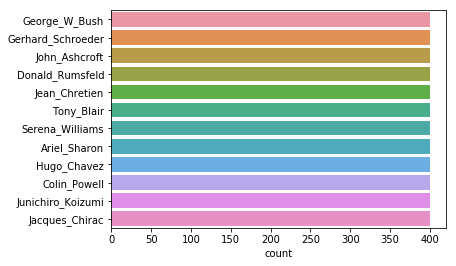

In [13]:
sns.countplot(y=y_augmented)

In [14]:
X = np.array(X_augmented)
y = np.array(y_augmented)

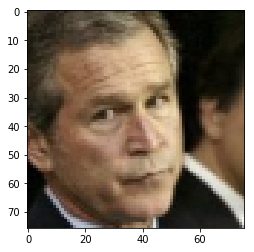

In [15]:
plt.imshow(X[0])

(4800, 76, 76, 3)

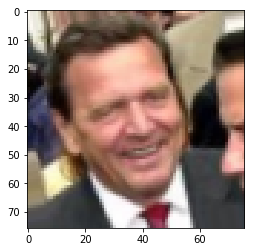

In [16]:
plt.imshow(X[789])
X.shape

## Step 3: One Hot Encoding Labels

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
lblEncoder = LabelEncoder()
y = lblEncoder.fit_transform(y)
print(y.shape)
y = y.reshape(len(y), 1)
print(y.shape)
onehot = OneHotEncoder(sparse=False)
y = onehot.fit_transform(y)
print(y.shape)

(4800,)
(4800, 1)
(4800, 12)


In [18]:
X[0].shape

(76, 76, 3)

## Step 4: Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=True)

## Step 5: Modelling Data using CNN

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Convolution2D, Lambda, Flatten, Dropout
from keras.callbacks import History
from keras.optimizers import Adam

Using TensorFlow backend.


In [21]:
model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape= (76,76,3)))
model.add(Convolution2D(filters= 3 , kernel_size= 3 , strides= (1,1) , padding='same', activation='relu' ))
model.add(Convolution2D(filters= 8 , kernel_size= 3 , strides= (1,1) , padding='valid', activation='relu' ))
model.add(Convolution2D(filters= 32 , kernel_size= 3 , strides= (1,1) , padding='valid', activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2) , strides=2))
model.add(Convolution2D(filters= 64 , kernel_size= 3 , strides= (1,1) , padding='valid', activation='relu' ))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='softmax'))

In [22]:
model.compile(optimizer=Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model.fit(X_train,y_train , validation_split= 0.1 , verbose=1, epochs= 10, batch_size=16)

Train on 3888 samples, validate on 432 samples
Epoch 1/10
3888/3888 [==============================] - 87s 22ms/step - loss: 2.2767 - acc: 0.2163 - val_loss: 1.9216 - val_acc: 0.3912
Epoch 2/10
3888/3888 [==============================] - 32s 8ms/step - loss: 1.8309 - acc: 0.3904 - val_loss: 1.5236 - val_acc: 0.5486
Epoch 3/10
3888/3888 [==============================] - 32s 8ms/step - loss: 1.4699 - acc: 0.5162 - val_loss: 1.2639 - val_acc: 0.6343
Epoch 4/10
3888/3888 [==============================] - 32s 8ms/step - loss: 1.1701 - acc: 0.6199 - val_loss: 1.0305 - val_acc: 0.6736
Epoch 5/10
3888/3888 [==============================] - 32s 8ms/step - loss: 0.9224 - acc: 0.7027 - val_loss: 0.8088 - val_acc: 0.7546
Epoch 6/10
3888/3888 [==============================] - 32s 8ms/step - loss: 0.7305 - acc: 0.7582 - val_loss: 0.6767 - val_acc: 0.7870
Epoch 7/10
3888/3888 [==============================] - 32s 8ms/step - loss: 0.5737 - acc: 0.8230 - val_loss: 0.5706 - val_acc: 0.8218
Epoch 8

## Step 6: Saving Model for Later Use

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 76, 76, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 76, 76, 3)         84        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 8)         224       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 32)        2336      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 73984)             0         
__________

In [25]:
model.save('model_v1.h5')

## Step 8: Visualizing Losses and Accuracy

c:\users\kanwal\miniconda3\lib\site-packages\keras\engine\sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
c:\users\kanwal\miniconda3\lib\site-packages\keras\engine\sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


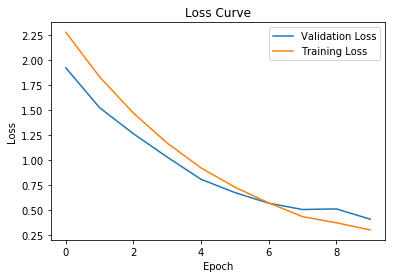

In [26]:
val_loss = model.model.history.history['val_loss']
tra_loss = model.model.history.history['loss']

plt.plot(val_loss)
plt.plot(tra_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Validation Loss', 'Training Loss'])
plt.show()

c:\users\kanwal\miniconda3\lib\site-packages\keras\engine\sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '
c:\users\kanwal\miniconda3\lib\site-packages\keras\engine\sequential.py:109: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


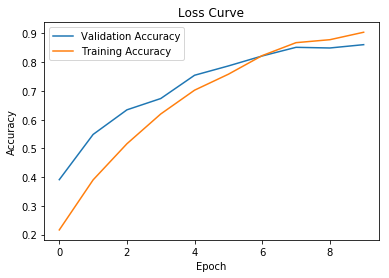

In [27]:
val_acc = model.model.history.history['val_acc']
tra_acc = model.model.history.history['acc']

plt.plot(val_acc)
plt.plot(tra_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Loss Curve')
plt.legend(['Validation Accuracy', 'Training Accuracy'])
plt.show()

## Step 9: Testing Trained Neural Network

In [28]:
from tensorflow import keras
from keras.models import load_model

In [29]:
saved_model = load_model('model_v1.h5')

In [30]:
y_pred = saved_model.predict(x = X_test , batch_size= 16)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
print(classification_report( np.argmax(y_test,1) , np.argmax(y_pred,1)))

             precision    recall  f1-score   support

          0       1.00      0.79      0.89        39
          1       0.89      0.89      0.89        38
          2       0.85      0.83      0.84        35
          3       0.85      0.73      0.79        48
          4       0.77      0.82      0.80        40
          5       0.79      0.93      0.85        41
          6       0.90      0.88      0.89        42
          7       0.86      0.90      0.88        48
          8       0.87      0.94      0.90        35
          9       0.90      0.97      0.94        39
         10       1.00      1.00      1.00        33
         11       0.78      0.76      0.77        42

avg / total       0.87      0.87      0.87       480



In [33]:
print('Test Accuracy:',accuracy_score(np.argmax(y_test,1) , np.argmax(y_pred,1)))

Test Accuracy: 0.8666666666666667


In [34]:
print(confusion_matrix(np.argmax(y_test,1) , np.argmax(y_pred,1)))

[[31  1  0  1  0  0  1  4  0  0  0  1]
 [ 0 34  1  1  1  0  0  1  0  0  0  0]
 [ 0  0 29  2  2  1  0  1  0  0  0  0]
 [ 0  0  2 35  5  0  0  0  1  2  0  3]
 [ 0  0  0  0 33  3  0  0  2  0  0  2]
 [ 0  0  0  2  0 38  0  0  0  0  0  1]
 [ 0  2  0  0  0  0 37  1  0  1  0  1]
 [ 0  1  1  0  0  1  1 43  0  0  0  1]
 [ 0  0  0  0  0  1  0  0 33  1  0  0]
 [ 0  0  0  0  0  1  0  0  0 38  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 33  0]
 [ 0  0  1  0  2  3  2  0  2  0  0 32]]
